## Analyze A/B Test Results

The project goal is to work through this notebook and understand the results of an A/B test run by an e-commerce website to guide the company if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.



### A/B Testing

A/B tests are experiments conducted on a web page to evaluate changes. In an A/B test, a control group is shown the old version of the web page, while an experiment group is shown the new version. A metric is then chosen to measure user engagement in each group. The results are used to determine if the new version is more effective than the old version. 

A/B testing is analogous to hypothesis testing, with the following hypotheses:

- **Null Hypothesis:** The new version is no better or worse than the old version.
- **Alternative Hypothesis:** The new version is better than the old version.

If we fail to reject the null hypothesis, it suggests keeping the old version. If we reject the null hypothesis, it suggests launching the change. A/B tests can assess a wide range of changes, from major feature additions to minor color adjustments, to identify the change that maximizes the chosen metric.

### Drawbacks of A/B Testing

While A/B testing is valuable, it has limitations:

1. **Change Aversion:** Existing users may prefer the old version due to resistance to change, even if the new version is superior.
2. **Novelty Effect:** Existing users may prefer the new version due to its novelty, even if it isn't objectively better in the long term.

These biases can affect the reliability of A/B test results, especially when testing on existing users. It's important to consider these factors when interpreting A/B test outcomes.


We'll analyze the A/B test results for an online education company. The company has a customer funnel for typical new users on their site:

1. **View home page**
2. **Explore courses**
3. **View course overview page**
4. **Enroll in course**
5. **Complete course**

Similar to many online platforms, the company experiences a drop-off in users as they progress through each stage of the funnel, with only a few users reaching the final stage of completing a course. To address this issue and increase student engagement, the company is conducting A/B tests to evaluate changes aimed at improving conversion rates from one stage to the next.

We’ll analyze test results for two changes they have in mind and then make a recommendation on :
1) The first change they want to try is on their homepage. They hope that this new, more engaging design will increase the number of users who explore their courses. The metric we will use is the click-through rate for the Explore Courses button on the home page. Click-through rate (CTR) is often defined as the number of clicks divided by the number of views.

2) The second change, They want to conduct A/B testing which is a more career-focused description on a course overview page. They hope that this change may encourage more users to enroll and complete this course. In this experiment, we’re going to analyze the following metrics:

    - Enrollment Rate: Click-through rate for the Enroll button on the course overview page
    - Average Reading Duration: Average number of seconds spent on the course overview page
    - Average Classroom Time: Average number of days spent in the classroom for students enrolled in the course
    - Completion Rate: Course completion rate for students enrolled in the course





---

## 1) The First Change 
They want to try is on their homepage. They hope that this new, more engaging design will increase the number of users who explore their courses. The metric we will use is the click-through rate for the Explore Courses button on the home page. Click-through rate (CTR) is often defined as the number of clicks divided by the number of views.

Metric: CTR: # clicks by unique users / # views by unique users

Now that we have our metric, let's set up our null and alternative hypotheses:

$$ H_0 : CTR_{{new}}<= CTR_{{old}}$$


$$H_1 : CTR_{{new}} > CTR_{{old}}$$

Our alternative hypothesis is what we want to prove to be true. In this case, the new homepage design has a higher click-through rate than the old homepage design. And the null hypothesis is what we assume to be true before analyzing data, which is that the new homepage design has a click-through rate that is less than or equal to that of the old homepage design. 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

np.random.seed(42)

In [2]:

df_homepage = pd.read_csv("homepage_actions.csv")
df_homepage.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


In [3]:
control_df_homepage = df_homepage.query('group == "control"')

In [4]:
control_df_homepage_ctr = control_df_homepage.query('action == "click"').id.nunique() / control_df_homepage.query('action == "view"').id.nunique() 

In [5]:
control_df_homepage_ctr

0.2797118847539016

In [6]:
experiment_df_homepage = df_homepage.query('group == "experiment"')

In [7]:
experiment_df_homepage_ctr = experiment_df_homepage.query('action == "click"').id.nunique() / experiment_df_homepage.query('action == "view"').id.nunique() 

In [8]:
experiment_df_homepage_ctr

0.3097463284379172

In [9]:
obs_diff = experiment_df_homepage_ctr - control_df_homepage_ctr
obs_diff

0.030034443684015644

In [10]:
# Create a sampling distribution of the difference in proportions
# with bootstrapping
diff_homepage_ctr = []
for _ in range(10000):
    bootsample = df_homepage.sample(df_homepage.shape[0],replace = True)
    control_df = bootsample.query('group == "control"')
    experiment_df = bootsample.query('group == "experiment"')
    control_ctr = control_df.query('action == "click"').id.nunique() / control_df.query('action == "view"').id.nunique() 
    experiment_ctr = experiment_df.query('action == "click"').id.nunique() / experiment_df.query('action == "view"').id.nunique()
    diff_homepage_ctr.append(experiment_ctr - control_ctr)


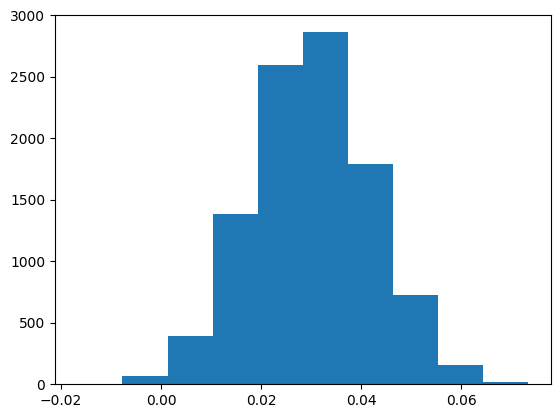

In [11]:
plt.hist(diff_homepage_ctr);

In [12]:
diff_homepage_ctr = np.array(diff_homepage_ctr)
null_vals = np.random.normal(0,diff_homepage_ctr.std(), diff_homepage_ctr.size)

                 Statistic =  0.030034443684015644


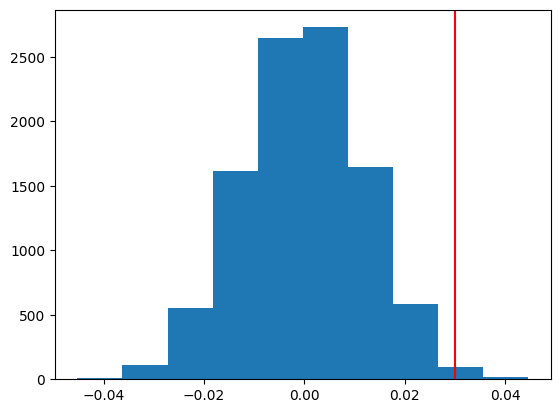

In [13]:
plt.hist(null_vals);
plt.axvline(x = obs_diff, color = "red");
print("                 Statistic = ",obs_diff)

#### Calculating the P-value

In [14]:
p_value = (null_vals > obs_diff).mean()
p_value

0.0055

#### Conclusion
We will reject the null hypothesis as the P-value = 0.0055 which is less than 0.05 and we use confidence of 95% (α = 0.05) this means that the new homepage has more click-through rate for the Explore Courses button this could be an advantage or a good indicator to make the company run the new homepage


---


## 2) The Second Change

The second change they want to try is on their description of course overview page . They hope that this change may encourage more users to enroll and complete this course, and we're going to analyze the following metrics:

1. **Enrollment Rate:** Click-through rate for the Enroll button on the course overview page
2. **Average Reading Duration:** Average number of seconds spent on the course overview page
3. **Average Classroom Time:** Average number of days spent in the classroom for students enrolled in the course
4. **Completion Rate:** Course completion rate for students enrolled in the course






<hr style="border-top: 0.2px solid rgba(#ccc,0.02);">





1) Enrollment Rate

    Metric: CTR: # clicks on enroll button by unique users / # views by unique users

    Now that we have our metric, let's set up our null and alternative hypotheses:

$$ H_0 : CTR_{{new}}<= CTR_{{old}}$$


$$H_1 : CTR_{{new}} > CTR_{{old}}$$

In [15]:
np.random.seed(42)
df_coursepage = pd.read_csv('course_page_actions.csv')
df_coursepage.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


In [16]:
# Get dataframe with all records from control group
control_df = df_coursepage.query('group == "control"')

# Compute click through rate for control group
control_ctr = control_df.query('action == "enroll"').id.nunique() / control_df.query('action == "view"').id.nunique()

# Display click through rate
control_ctr

0.2364438839848676

In [17]:
# Get dataframe with all records from experiment group
experiment_df = df_coursepage.query('group == "experiment"')

# Compute click through rate for experiment group
experiment_ctr = experiment_df.query('action == "enroll"').id.nunique() / experiment_df.query('action == "view"').id.nunique()

# Display click through rate
experiment_ctr

0.2668693009118541

In [18]:
# Compute the observed difference in click through rates
obs_diff = experiment_ctr - control_ctr

# Display observed difference
obs_diff

0.030425416926986526

In [19]:
# Create a sampling distribution of the difference in proportions
# with bootstrapping

diffs_coursepage = []

for _ in range(10000):
    bootsample = df_coursepage.sample(df_coursepage.shape[0], replace=True)
    control_df = bootsample.query('group == "control"')
    experiment_df = bootsample.query('group == "experiment"')
    control_ctr = control_df.query('action == "enroll"').id.nunique() / control_df.query('action == "view"').id.nunique()
    experiment_ctr = experiment_df.query('action == "enroll"').id.nunique() / experiment_df.query('action == "view"').id.nunique()
    diffs_coursepage.append(experiment_ctr - control_ctr)


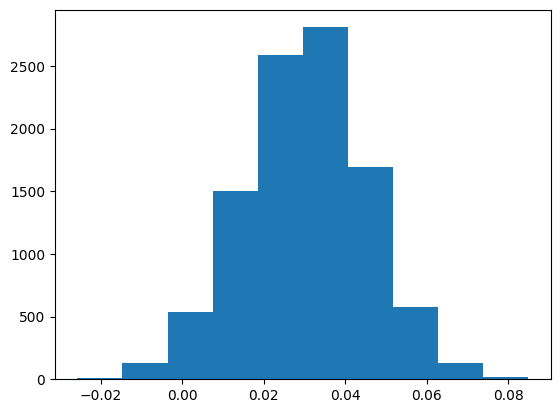

In [20]:
plt.hist(diffs_coursepage);


In [21]:
diffs_coursepage = np.array(diffs_coursepage)
null_vals = np.random.normal(0,diffs_coursepage.std(), diffs_coursepage.size)

                 Statistic =  0.030425416926986526


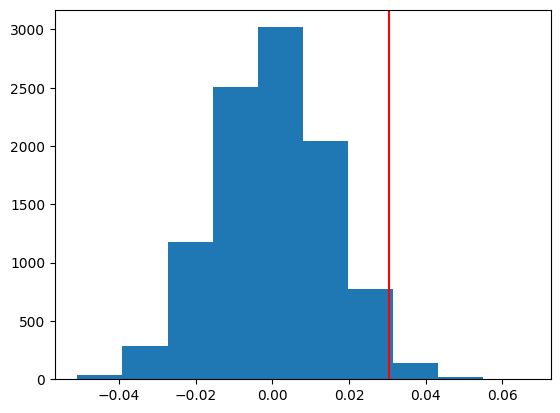

In [22]:
plt.hist(null_vals);
plt.axvline(x = obs_diff, color = "red");
print("                 Statistic = ",obs_diff)

#### Calculating the P-value

In [23]:
p_value = (null_vals > obs_diff).mean()
p_value

0.0188

#### Conclusion
We will reject the null hypothesis as the P-value = 0.0188 which is less than 0.05 and we use confidence of 95% (α = 0.05) this means that the enrollment rate for this course increases when using the experimental description on its overview page

---





2) Average Reading Duration

    Metric: Average number of seconds spent on the course overview page

    Now that we have our metric, let's set up our null and alternative hypotheses:

$$ H_0 : RAVG_ {{new}}<= RAVG_ {{old}}$$


$$H_1 : RAVG_ {{new}} > RAVG_ {{old}}$$

In [82]:
np.random.seed(42)


In [25]:
control_mean = df_coursepage.query('group == "control"')['duration'].mean()
experiment_mean = df_coursepage.query('group == "experiment"')['duration'].mean()
control_mean, experiment_mean


(115.40710650582048, 130.93220512539497)

In [26]:
obs_diff = experiment_mean - control_mean
obs_diff

15.525098619574493

In [27]:
diffs = []
for _ in range(10000):
    bootsample = df_coursepage.sample(df_coursepage.shape[0],replace = True)
    control_mean = bootsample.query('group == "control"')['duration'].mean()
    experiment_mean = bootsample.query('group == "experiment"')['duration'].mean()
    diffs.append(experiment_mean - control_mean)

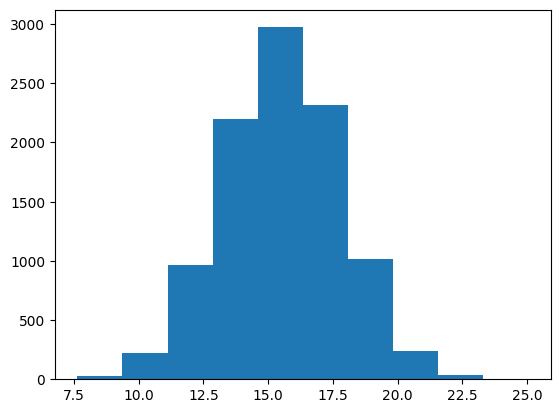

In [28]:
diffs = np.array(diffs)
plt.hist(diffs);

In [29]:
null_vals = np.random.normal(0,diffs.std(), diffs.size)

                 Statistic =  15.525098619574493


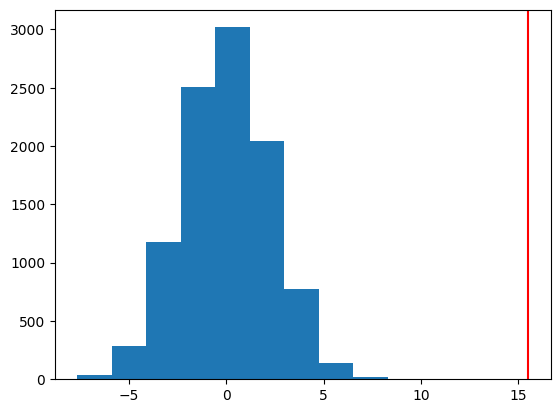

In [30]:
plt.hist(null_vals);
plt.axvline(x = obs_diff, color = "red");
print("                 Statistic = ",obs_diff)

#### Calculating the P-value

In [31]:
p_value = (null_vals > obs_diff).mean()
p_value

0.0

#### Conclusion
We will reject the null hypothesis as the P-value = 0 which is less than 0.05 and we use confidence of 95% (α = 0.05) this means that the average reading time for experiment users that uses the new change is more than the control users 

---





3) Average Classroom Time

    Metric: Average number of days spent in the classroom for students enrolled in the course
    Now that we have our metric, let's set up our null and alternative hypotheses:

$$ H_0 : DAVG_ {{new}}<= DAVG_ {{old}}$$


$$H_1 : DAVG_ {{new}} > DAVG_ {{old}}$$

In [33]:
np.random.seed(42)
df_classroom = pd.read_csv('classroom_actions.csv')
df_classroom.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [34]:
# get the average classroom time for control group
control_mean = df_classroom.query('group == "control"')['total_days'].mean()

# get the average classroom time for experiment group
experiment_mean = df_classroom.query('group == "experiment"')['total_days'].mean()


# display average classroom time for each group
control_mean, experiment_mean

(73.36899038461539, 74.6715935334873)

In [35]:
# compute observed difference in classroom time
obs_diff = experiment_mean - control_mean

# display observed difference
obs_diff

1.3026031488719099

In [36]:
# create sampling distribution of difference in average classroom times
# with boostrapping
diffs = []
for _ in range(10000):
    bootsample = df_classroom.sample(df.shape[0], replace = True)
    control_mean = bootsample.query('group == "control"')['total_days'].mean()
    experiment_mean = bootsample.query('group == "experiment"')['total_days'].mean()
    diffs.append(experiment_mean - control_mean)


In [37]:
# convert to numpy array
diffs = np.array(diffs)

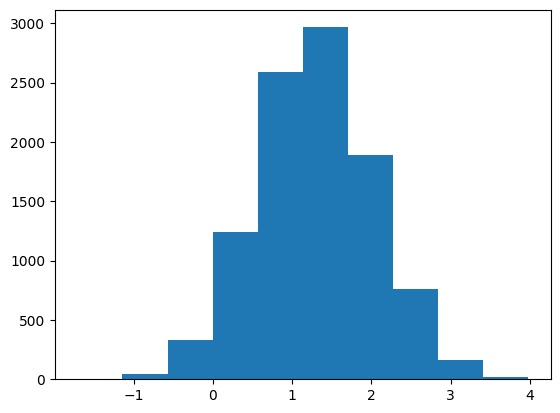

In [38]:
# plot sampling distribution
plt.hist(diffs);

                 Statistic =  1.3026031488719099


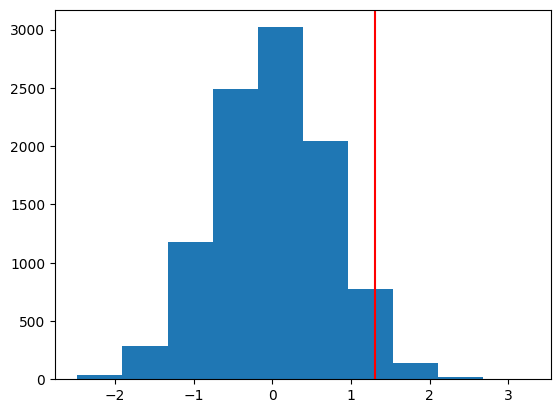

In [39]:
# simulate distribution under the null hypothesis
null_vals = np.random.normal( 0, diffs.std(), diffs.size)
plt.hist(null_vals);
plt.axvline(x = obs_diff, color = "red");
print("                 Statistic = ",obs_diff)

In [40]:
# compute p value
p_value = (null_vals > obs_diff).mean()
p_value

0.0384

#### Conclusion
We will reject the null hypothesis as the P-value = 0.0384 which is less than 0.05 and we use confidence of 95% (α = 0.05) this means that the average days the student engage with the classroom for experiment users is more than the control users 

Even if the increase in classroom time is statistically significant, engaging students for 1.3 more days in the classroom, when they average around 74 days in total, doesn't seem to indicate a large enough value to launch this change from a practical perspective for Website.

---





4) Completion Rate

    Metric: Course completion rate for students enrolled in the course
    Now that we have our metric, let's set up our null and alternative hypotheses:

$$ H_0 : CR_ {{new}}<= CR_ {{old}}$$


$$H_1 : CR_ {{new}} > CR_ {{old}}$$

In [53]:
np.random.seed(42)

In [54]:
# Create dataframe with all control records
control_df = df_classroom.query('group == "control"')

# Compute completion rate
control_ctr = control_df['completed'].mean()

# Display control complete rate
control_ctr


0.3719951923076923

In [55]:
# Create dataframe with all experiment records
experiment_df = df_classroom.query('group == "experiment"')

# Compute completion rate
experiment_ctr = experiment_df['completed'].mean()

# Display experiment complete rate
experiment_ctr

0.3935334872979215

In [56]:
# Compute observed difference in completion rates
obs_diff = experiment_ctr - control_ctr

# Display observed difference in completion rates
obs_diff

0.02153829499022919

In [57]:
# Create sampling distribution for difference in completion rates
# with boostrapping
diffs = []
size = df_classroom.shape[0]
for _ in range(10000):
    bootsample = df_classroom.sample(size, replace=True)
    control_df = bootsample.query('group == "control"')
    experiment_df = bootsample.query('group == "experiment"')
    control_ctr = control_df['completed'].mean()
    experiment_ctr = experiment_df['completed'].mean()
    diffs.append(experiment_ctr - control_ctr)

In [58]:
# convert to numpy array
diffs = np.array(diffs)

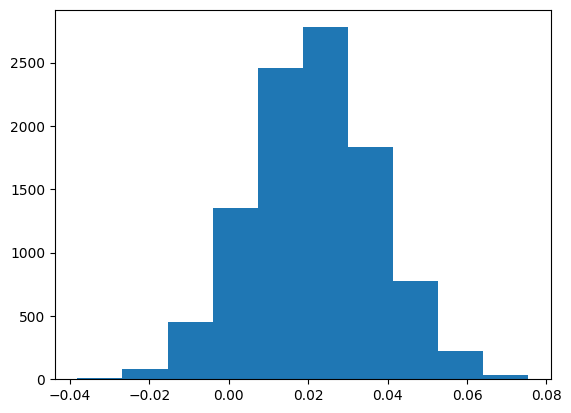

In [59]:
# plot distribution
plt.hist(diffs);

In [60]:
# create distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

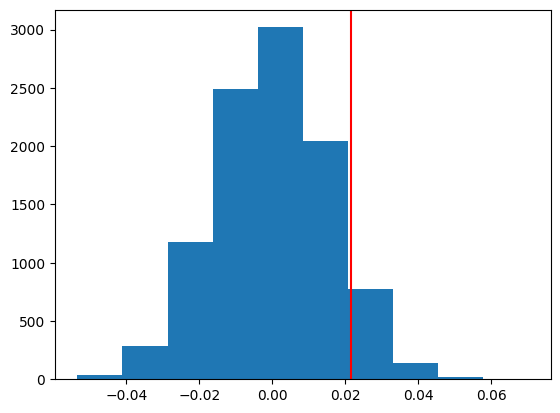

In [61]:
# plot null distribution
plt.hist(null_vals);

# plot line for observed statistic
plt.axvline(obs_diff, c='red');

In [62]:
# compute p value
(null_vals > obs_diff).mean()

0.0846

#### Conclusion
We will not reject the null hypothesis as the P-value = 0.0846 which is more than 0.05 and we use confidence of 95% (α = 0.05) this means that the completion rate after the second change has no significance effect before the change of the description on course overview page


---

#### The Challenge of Multiple Testing in Website Optimization
When it comes to optimizing a website, it's common practice to experiment with various changes to improve user engagement and performance. However, conducting multiple tests simultaneously can lead to an increased risk of false positives, where we mistakenly conclude that a change has a significant impact when it actually doesn't.

#### The Problem:
Suppose we're analyzing the effectiveness of two different changes to our website:
1) The first change they want to try is on their homepage.
2) The second change is changing the description on a course overview page.

 each targeting a different aspect such as click-through rate (CTR) of the homepage, enrollment rate, reading duration, classroom time, and completion rate. and  If we were to test each metric individually using a significance level (alpha) of 0.05 (or 5%), we'd expect a 5% chance of encountering a false positive for each test. However, when conducting multiple tests simultaneously, this risk accumulates that can become about  0.2262 significance which is very high.

#### The Solution
To address this issue and ensure robust statistical inference, we employ the Holm-Bonferroni method. This method adjusts the significance level for each test based on the number of comparisons being made, thereby controlling the overall family-wise error rate.


### Applying the Holm-Bonferroni Method for Multiple Testing Correction

1. **Order the p-values:**
   - Arrange the p-values in ascending order.

2. **Calculate adjusted significance levels:**
   - For each rank (starting from the smallest p-value), compute the adjusted significance level using the formula:
   
     - $ HB = \frac{\text{Target } \alpha}{n - \text{rank} + 1} $
     - Where:
     
       - $ \text{Target } \alpha $ is the desired overall significance level (usually 0.05).
       - $ n $ is the total number of tests.
       - $ \text{rank} $ is the rank of the current p-value.

3. **Compare p-values to adjusted significance levels:**
   - Start with the smallest p-value and compare it to the corresponding adjusted significance level.
   - If the p-value is smaller than or equal to the adjusted significance level, reject the null hypothesis for that test.

4. **Stop testing after the first non-rejected hypothesis:**
   - Once a hypothesis is not rejected, stop testing. All subsequent hypotheses are considered non-significant.


​


In [63]:
# We have all the p-values sorted assendingly in the following dictionary:
p_values = {
    'Reading Duration': 0,
    'CTR of Homepage': 0.0055,
    'Enrollment Rate': 0.0188,
    'Classroom Time': 0.0384,
    'Completion Rate': 0.0846
}


In [80]:
### the adjusted p-values will computed by the following:
adjusted_alpha = {
    'Reading Duration': (0.05)/(5-1+1),
    'CTR of Homepage': (0.05)/(5-2+1),
    'Enrollment Rate': (0.05)/(5-3+1),
    'Classroom Time': (0.05)/(5-4+1),
    'Completion Rate': (0.05)/(5-5+1)
}

In [81]:
adjusted_alpha

{'Reading Duration': 0.01,
 'CTR of Homepage': 0.0125,
 'Enrollment Rate': 0.016666666666666666,
 'Classroom Time': 0.025,
 'Completion Rate': 0.05}

#### Conclusion:
These adjusted p-values will compare it with significance error 0.05 then:
1) CTR of Homepage p-value = 0.0055 whcih is less than 0.0125 then { Reject Null Hypnothesis}
2) Reading Duration p-value = 0 whcih is less than 0.01 then { Reject Null Hypnothesis}
3) Enrollment Rate p-value = 0.0188 whcih is more than 0.01666 then { Don't reject Null Hypnothesis}
4) Classroom Time p-value = 0.0384 whcih is more than 0.025 then { Don't reject Null Hypnothesis}
5) Completion Rate p-value = 0.0846 whcih is more than 0.05 then { Don't reject Null Hypnothesis}



Based on the statistical analysis and interpretation of the data, it is recommended to consider implementing the changes to the website that have shown statistically significant improvements in user engagement metrics, such as increasing reading duration and increasing the click-through rate (CTR) of the homepage, so the new website has advantage on 2 metrics from 5 